In [3]:
import torch 
# import sklearn

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
from pandas import DataFrame

from tqdm import tqdm 

# from transformers import BertModel, BertTokenizer
# from nltk.corpus import stopwords
from matplotlib.pyplot import figure
import matplotlib as mpl

In [2]:
import sys 
sys.path.append('..')

In [4]:
from data_utils import News20Data

In [6]:
batch_size=20
dataset = News20Data(data_path='../../data/news/', batch_size=batch_size)

Processing dataset ...
Reading data ...
... 0 seconds
Tokenizing and sorting train data ...
... 64 seconds
Tokenizing and sorting dev data ...
... 21 seconds
Tokenizing and sorting test data ...
... 21 seconds


In [18]:
def read_state_freq(path, N):
    state_freq = np.zeros(N)
    state_nonstop_freq = np.zeros(N)
    with open(path) as fd:
        lines = fd.readlines()
        for li, l in enumerate(lines):
            if(li % 3 == 0):
                l = l.split()
                state_id = int(l[1])
                state_freq[state_id] = int(l[3])
                state_nonstop_freq[state_id] = int(l[5])
                
    state_idx_sort = state_freq.argsort()[::-1]
    state_stop_freq = state_freq - state_nonstop_freq
    return state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort

def vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, N):
    figure(figsize=(6, 4), dpi=200)
    # fig, ax = plt.subplots()
    state_freq_ = state_freq[state_idx_sort]
    state_stop_freq_ = state_stop_freq[state_idx_sort]
    state_nonstop_freq_ = state_nonstop_freq[state_idx_sort]

    state_stop_freq_vis = np.log(state_freq_) * (state_stop_freq_ / state_freq_)
    state_nonstop_freq_vis = np.log(state_freq_) * (state_nonstop_freq_ / state_freq_)

    fig_stop = plt.bar(x=np.arange(N), height=state_stop_freq_vis, color='lightskyblue')
    fig_nonstop = plt.bar(x=np.arange(N), height=state_nonstop_freq_vis, bottom=state_stop_freq_vis, color='tab:blue')

    plt.legend((fig_stop, fig_nonstop), 
               ('Stopwords', 'Non-stopwords'), 
               fontsize=15)
    # plt.yscale('log')
    plt.tick_params(axis='both', which='both', left=False, labelsize=15, labelleft=False) 
    return

# State Freq. 50 States

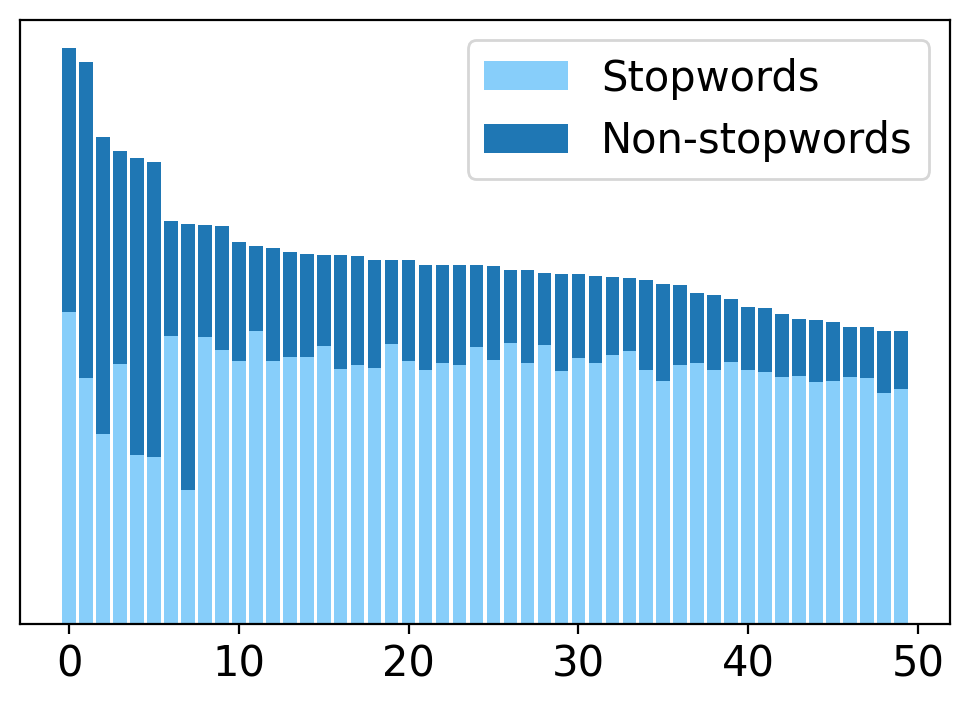

In [33]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.1.4.0/bertnet_dev_epoch_12_s2w.txt', 50)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 50)

# State Freq, 500 States

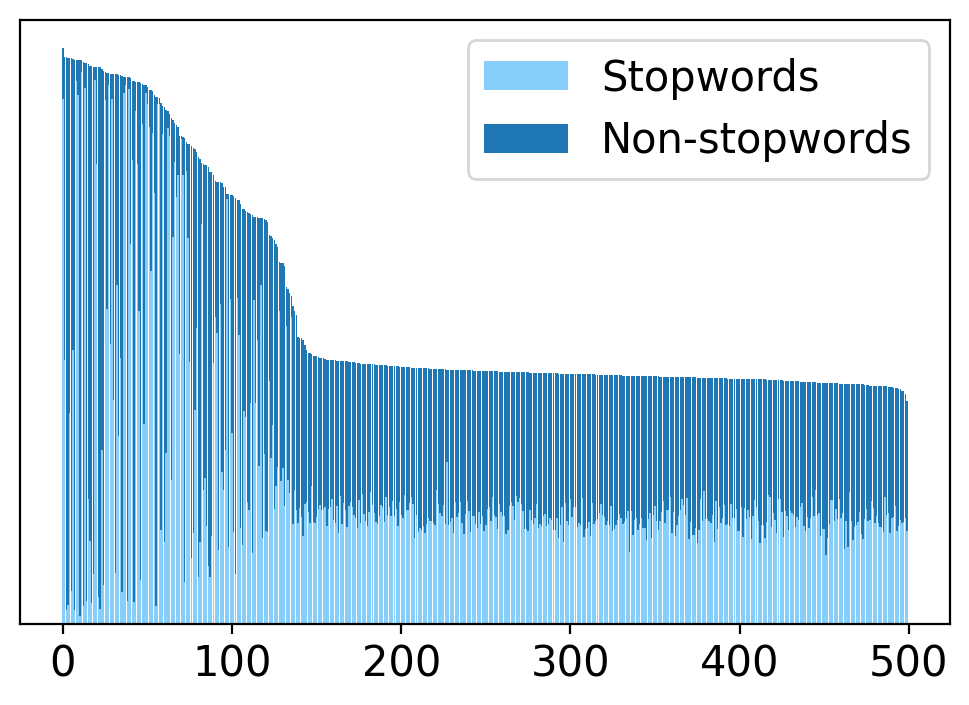

In [19]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.1.0.0/bertnet_dev_epoch_16_s2w.txt', 500)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 500)

# State Freq. 1000 States

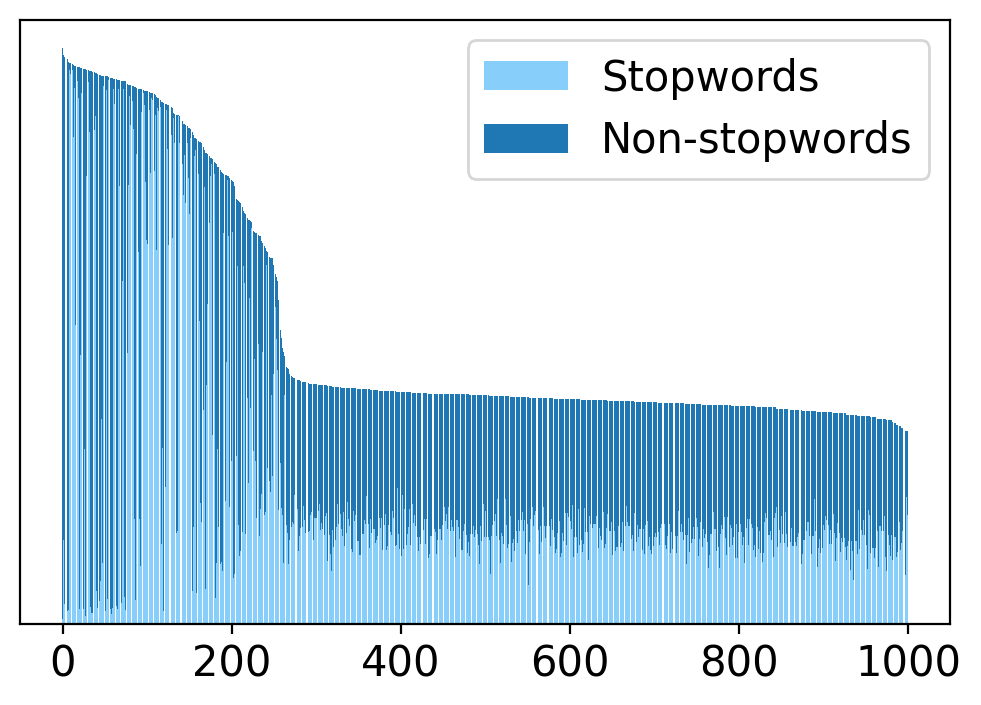

In [21]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.1.1.0/bertnet_dev_epoch_16_s2w.txt', 1000)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 1000)

# State Freq, 2000 States

# State Freq, 10000 States

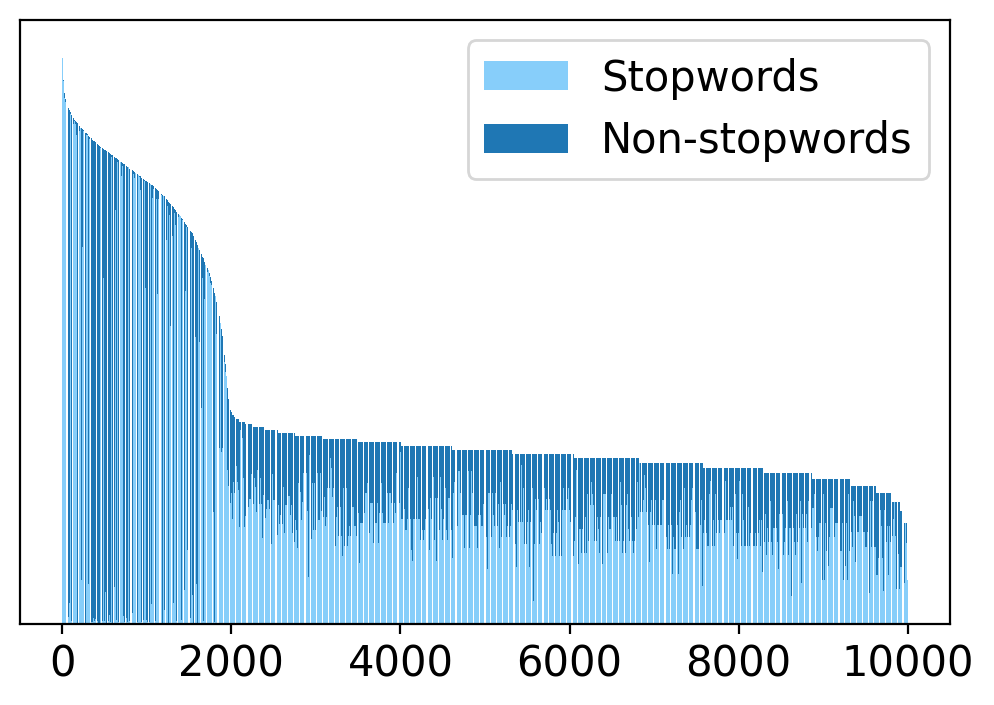

In [24]:
state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort = read_state_freq('/home/s1946695/RDP/outputs/bertnet_0.1.2.0/bertnet_dev_epoch_9_s2w.txt', 10000)
vis_state_freq(state_freq, state_nonstop_freq, state_stop_freq, state_idx_sort, 10000)